# Ejercicio Tipo SO - Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

## Importamos librerías

In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Cargamos los datos de entrada del archivo csv

In [8]:
dataframe = pd.read_csv("./trainES.csv")
dataframe.head()

,ID,Almacen,Modo_Envio,Llamadas_AT,Calificación_del_cliente,Coste_en_$,Compras_Previas,Importancia_Producto,Genero,Descuento,Peso_g,Llego_en_Tiempo_NY
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


El método dataframe.describe() nos dará algo de información estadística básica de nuestro set de datos. La Media, el desvío estándar, valores mínimo y máximo de cada característica.

In [9]:
dataframe.describe()

,ID,Llamadas_AT,Calificación_del_cliente,Coste_en_$,Compras_Previas,Descuento,Peso_g,Llego_en_Tiempo_NY
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


En este paso comprobamos cuantas observaciones tenemos de cada tipo usando la función groupby. Se observa que tenemos 86 usuarios “Almacen 0”, es decir Windows, 40 usuarios Mac, "Almacen 1" y 44 de Linux, "Almacen 2".

In [11]:
print(dataframe.groupby('Almacen').size())

Almacen
A    1833
B    1833
C    1833
D    1834
F    3666
dtype: int64


## Visualizamos los datos

Graficamos los histogramas de las cuatro "features"(variables independientes o características) de entrada con los nombres “duración”, “páginas”,”acciones” y “valor”. Observamos entre qué valores se mueven sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros.

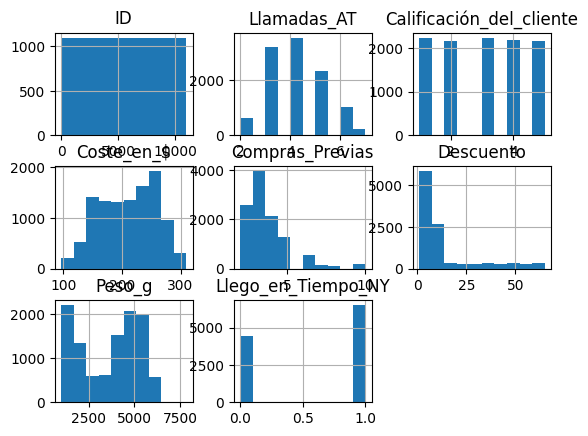

In [ ]:
dataframe.drop(['Almacen'],axis=1).hist()
plt.show()

## Creamos el modelo

Cargamos las variables de las 4 columnas de entrada en **X** (conjunto de variables independientes y, por tanto, variables de entrada) excluyendo la columna “Almacen” (variable de salida) usando el método drop().  
Para comprobar las predicciones, agregamos la columna “Almacen” en la variable **y** (variable de salida).   
Con la función **X.shape()** comprobamos la dimensión de nuestra matriz con datos de entrada (170 registros/filas por 4 columnas).



In [18]:
X = np.array(dataframe.drop(['Almacen'],axis=1))
y = np.array(dataframe['Almacen'])
X.shape

(10999, 11)

Pasamos a crear y entrenar nuestro modelo de Regresión Logística

In [19]:
model = linear_model.LogisticRegression()
model.fit(X,y)

ValueError: could not convert string to float: 'Flight'

Lanzamos las predicciones y tomamos como muestra las 5 primeras

In [20]:
predictions = model.predict(X)
print(predictions[0:5])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Comprobamos, usando la función **score()**, la precisión media de las predicciones del modelo

In [ ]:
model.score(X,y)

0.7823529411764706

In [ ]:
print(accuracy_score(y, predictions))

0.7823529411764706


In [ ]:
print(confusion_matrix(y, predictions))

[[74  5  7]
 [25 15  0]
 [ 0  0 44]]


In [ ]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        86
           1       0.75      0.38      0.50        40
           2       0.86      1.00      0.93        44

    accuracy                           0.78       170
   macro avg       0.79      0.75      0.74       170
weighted avg       0.78      0.78      0.76       170



# Clasificación de nuevos registros

Como último paso, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

Tiempo Duración: 10
Paginas visitadas: 3
Acciones al navegar: 5
Valoración: 9  

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [ ]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
prediccion = model.predict(X_new)
print(prediccion)

[2]


# Adicional: Validación del Modelo

Una buena práctica en Machine Learning es la de subdividir nuestro conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que nuestro algoritmo pueda fallar por “sobregeneralizar” (overfitting) el conocimiento.

Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y calculamos el nuevo scoring que ahora nos da 74%.

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.712637 (0.146407)


Y ahora hacemos las predicciones -en realidad clasificación- utilizando nuestro “cross validation set”, es decir del subconjunto que habíamos apartado. En este caso vemos que los aciertos fueron del 85% pero hay que tener en cuenta que el tamaño de datos era pequeño.

In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


## Reporte de Resultados

In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



# Clasificación de nuevos registros

Como último paso, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

Tiempo Duración: 10
Paginas visitadas: 3
Acciones al navegar: 5
Valoración: 9  

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [ ]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
prediccion = model.predict(X_new)
print(prediccion)

[2]
